In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data() 

In [4]:
print(X_train.shape)
print(X_test.shape)
img = X_test[201]
print(y_test[201])

(60000, 28, 28)
(10000, 28, 28)
6


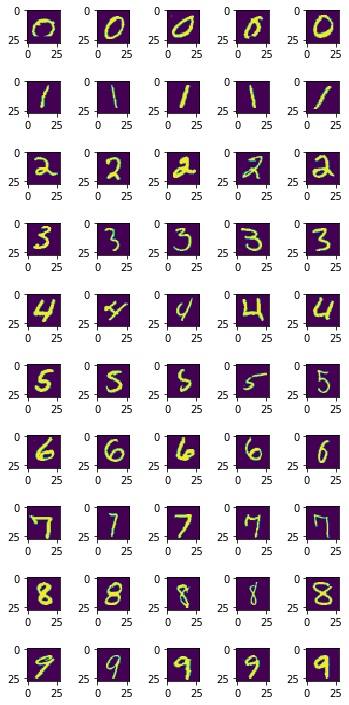

In [5]:
number_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :,:])
        

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
num_pixels = 784

X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixels, activation = 'relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history= model.fit(X_train,y_train, validation_split=0.1, epochs=12, batch_size=200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 5s 84us/step - loss: 0.5914 - acc: 0.8159 - val_loss: 0.2833 - val_acc: 0.9158
Epoch 2/12
54000/54000 [==============================] - 2s 37us/step - loss: 0.3302 - acc: 0.9039 - val_loss: 0.2420 - val_acc: 0.9317
Epoch 3/12
54000/54000 [==============================] - 2s 36us/step - loss: 0.2889 - acc: 0.9151 - val_loss: 0.2356 - val_acc: 0.9317
Epoch 4/12
54000/54000 [==============================] - 2s 37us/step - loss: 0.2715 - acc: 0.9211 - val_loss: 0.2262 - val_acc: 0.9315
Epoch 5/12
54000/54000 [==============================] - 2s 36us/step - loss: 0.2554 - acc: 0.9254 - val_loss: 0.2141 - val_acc: 0.9387
Epoch 6/12
54000/54000 [==============================] - 2s 36us/step - loss: 0.2437 - acc: 0.9289 - val_loss: 0.2126 - val_acc: 0.9357
Epoch 7/12
54000/54000 [==============================] - 2s 34us/step - loss: 0.2408 - acc: 0.9288 - val_loss: 0.2022 - val_acc:

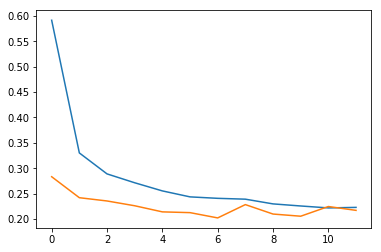

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ' ,score[0])
print('Test accuracy:', score[1])

Test score:  0.24280881922841072
Test accuracy: 0.9279


In [14]:
img= img/255
img= img.reshape(1,784)
prediction = model.predict_classes(img)
print('Predicted Digit: ', str(prediction))

Predicted Digit:  [6]
